In [546]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [547]:
df = pd.read_csv("trade_customs_dataset.csv")
df

,Shipment_ID,Origin_Country,Destination_Country,Shipment_Date,Estimated_Arrival_Date,Actual_Arrival_Date,Transport_Mode,Carrier_Name,Route_Code,Commodity_Type,...,HS_Code,Document_Status,Compliance_Score,Prior_Offense_Count,Tariff_Category,Route_Risk_Index,Inspection_Type,Delay_Reason,Customs_Delay_Days,Risk_Flag
0,SHP000001,India,China,2022-01-31,2022-02-12,2022-02-15,Air,Carrier_9,R854,Electronics,...,9935.21,Error,0.49,3,Low,0.16,Physical,"Incomplete paperwork, requires manual review",3,1
1,SHP000002,Germany,Brazil,2024-08-31,2024-09-24,2024-09-25,Sea,Carrier_36,R303,Machinery,...,9928.63,Complete,0.76,3,High,0.71,Document,Routine customs clearance without issue,1,1
2,SHP000003,China,Germany,2023-09-28,2023-10-13,2023-10-13,Road,Carrier_10,R320,Automotive,...,2674.21,Missing,0.58,0,Medium,0.52,Document,Incorrect HS code classification,0,0
3,SHP000004,Brazil,China,2024-02-25,2024-03-18,2024-03-21,Sea,Carrier_25,R180,Food,...,5803.90,Error,0.77,2,High,0.14,Physical,"Suspected undervaluation, needs reassessment",3,1
4,SHP000005,India,China,2021-07-22,2021-08-20,2021-08-20,Road,Carrier_6,R975,Pharmaceuticals,...,2654.58,Missing,0.52,3,High,0.51,Document,High-risk commodity flagged for inspection,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,SHP009996,Japan,India,2023-03-24,2023-04-16,2023-04-16,Rail,Carrier_34,R839,Electronics,...,8092.75,Missing,0.57,2,Medium,0.82,Physical,"Incomplete paperwork, requires manual review",0,0
9996,SHP009997,South Africa,India,2024-02-22,2024-03-02,2024-03-05,Air,Carrier_48,R271,Pharmaceuticals,...,2514.56,Error,0.91,3,High,0.61,Document,Random inspection selected,3,1
9997,SHP009998,USA,Brazil,2020-07-21,2020-08-12,2020-08-15,Sea,Carrier_9,R635,Pharmaceuticals,...,2708.74,Missing,0.70,2,Medium,0.81,Document,Routine customs clearance without issue,3,1
9998,SHP009999,Australia,Brazil,2020-08-10,2020-09-08,2020-09-10,Road,Carrier_50,R617,Pharmaceuticals,...,3055.95,Missing,0.96,2,High,0.34,Document,Routine customs clearance without issue,2,1


In [548]:
df.columns

Index(['Shipment_ID', 'Origin_Country', 'Destination_Country', 'Shipment_Date',
       'Estimated_Arrival_Date', 'Actual_Arrival_Date', 'Transport_Mode',
       'Carrier_Name', 'Route_Code', 'Commodity_Type', 'Declared_Value_USD',
       'Weight_kg', 'HS_Code', 'Document_Status', 'Compliance_Score',
       'Prior_Offense_Count', 'Tariff_Category', 'Route_Risk_Index',
       'Inspection_Type', 'Delay_Reason', 'Customs_Delay_Days', 'Risk_Flag'],
      dtype='object')

<Axes: >

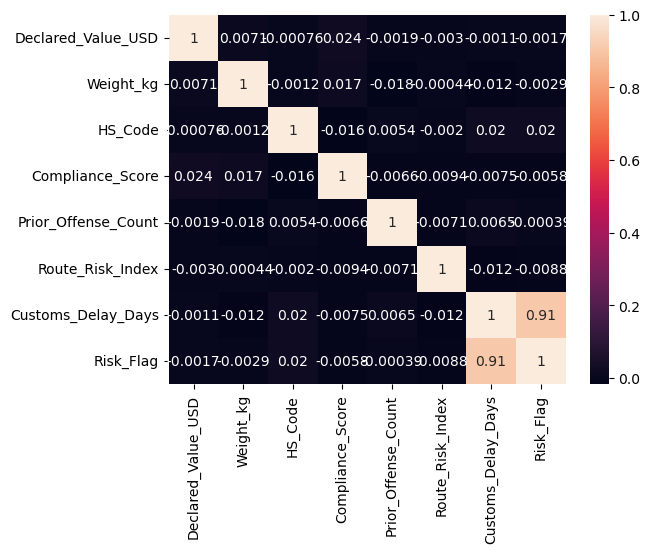

In [549]:
sns.heatmap(df.corr(numeric_only= True), annot= True)

In [550]:
df = df.drop_duplicates()

In [551]:
# Droping unwanted columns
cols = ['Origin_Country','Destination_Country',  'Transport_Mode', 'Tariff_Category', 'Commodity_Type', 'Weight_kg','Declared_Value_USD', 'Compliance_Score','Route_Risk_Index', 'Risk_Flag']
df = df[cols]

In [552]:
df

,Origin_Country,Destination_Country,Transport_Mode,Tariff_Category,Commodity_Type,Weight_kg,Declared_Value_USD,Compliance_Score,Route_Risk_Index,Risk_Flag
0,India,China,Air,Low,Electronics,3013.36,36867.70,0.49,0.16,1
1,Germany,Brazil,Sea,High,Machinery,4337.57,3846.10,0.76,0.71,1
2,China,Germany,Road,Medium,Automotive,957.85,9909.42,0.58,0.52,0
3,Brazil,China,Sea,High,Food,1491.58,22165.31,0.77,0.14,1
4,India,China,Road,High,Pharmaceuticals,3936.62,23347.43,0.52,0.51,0
...,...,...,...,...,...,...,...,...,...,...
9995,Japan,India,Rail,Medium,Electronics,2953.99,44713.49,0.57,0.82,0
9996,South Africa,India,Air,High,Pharmaceuticals,3781.63,1802.01,0.91,0.61,1
9997,USA,Brazil,Sea,Medium,Pharmaceuticals,3892.04,37810.97,0.70,0.81,1
9998,Australia,Brazil,Road,High,Pharmaceuticals,144.58,2543.20,0.96,0.34,1


In [553]:
df.isna().sum()

Origin_Country         0
Destination_Country    0
Transport_Mode         0
Tariff_Category        0
Commodity_Type         0
Weight_kg              0
Declared_Value_USD     0
Compliance_Score       0
Route_Risk_Index       0
Risk_Flag              0
dtype: int64

<Axes: >

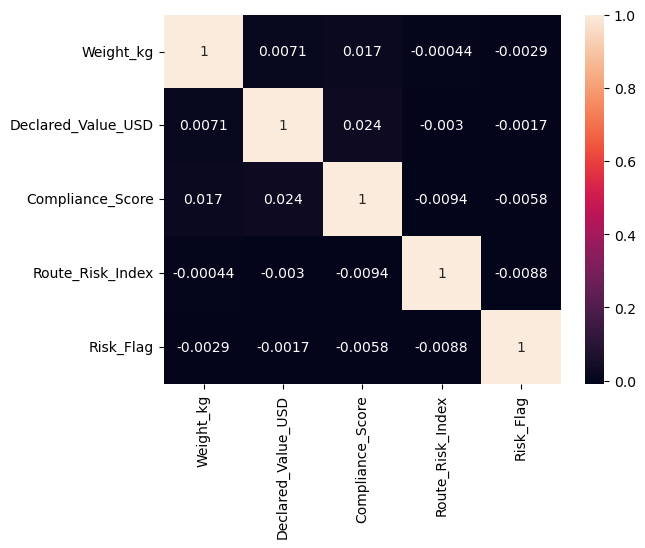

In [554]:
sns.heatmap(df.corr(numeric_only= True), annot= True)

<Axes: >

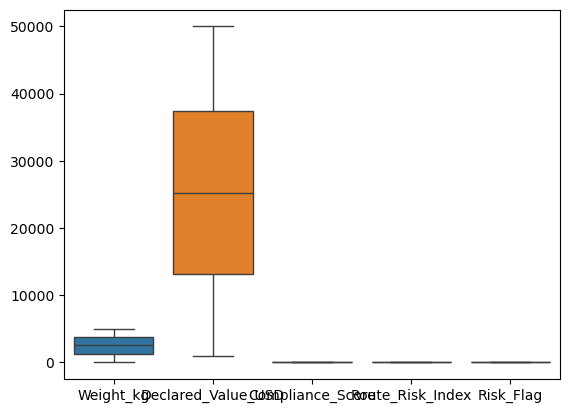

In [555]:
sns.boxplot(df)

In [556]:
# df['valuvation'] =  df['Declared_Value_USD']/ df['Weight_kg']

In [557]:
df = df.drop(columns=['Origin_Country', 'Destination_Country','Tariff_Category','Route_Risk_Index','Compliance_Score','Declared_Value_USD'])

In [558]:
# Encoding
df.columns

Index(['Transport_Mode', 'Commodity_Type', 'Weight_kg', 'Risk_Flag'], dtype='object')

In [559]:
# df['Origin_Country'].unique()

In [560]:
# df['Destination_Country'].unique()

In [561]:
df['Transport_Mode'].unique()

array(['Air', 'Sea', 'Road', 'Rail'], dtype=object)

In [562]:
df['Commodity_Type'].unique()

array(['Electronics', 'Machinery', 'Automotive', 'Food',
       'Pharmaceuticals', 'Textiles'], dtype=object)

In [563]:
# I am doing one hot encoding becaues we have limited values
x = df.drop(columns=['Risk_Flag'])
y = df['Risk_Flag']

In [564]:
x_encoded = pd.get_dummies(df,drop_first=True)

In [565]:
x_encoded = x_encoded.astype(int)

In [566]:
# Creating model 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
# from xgboost import XGBClassifier

In [567]:
scale = StandardScaler()
x_encoded = scale.fit_transform(x_encoded)
x_train,x_test,y_train,y_test = train_test_split(x_encoded,y,train_size=0.33,random_state=42)

In [568]:
# For Stack Classifier

est = [
    ( 'SVM' , SVC(kernel='rbf') ),
    ('Decision Tree' , DecisionTreeClassifier(max_depth=5, criterion= 'gini')),
    ('Navie Bayse' , GaussianNB())
    ]

final_est =  LogisticRegression()

mixture = StackingClassifier(estimators= est, final_estimator= final_est , cv= 5)

In [569]:
mixture.fit(x_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('SVM', SVC()),
                               ('Decision Tree',
                                DecisionTreeClassifier(max_depth=5)),
                               ('Navie Bayse', GaussianNB())],
                   final_estimator=LogisticRegression())

In [570]:
y_predict  = mixture.predict(x_test)

In [571]:
from sklearn.metrics import accuracy_score,f1_score, classification_report

print(classification_report(y_true= y_test, y_pred= y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2525
           1       1.00      1.00      1.00      2560
           2       1.00      1.00      1.00      1615

    accuracy                           1.00      6700
   macro avg       1.00      1.00      1.00      6700
weighted avg       1.00      1.00      1.00      6700



In [572]:
x

,Transport_Mode,Commodity_Type,Weight_kg
0,Air,Electronics,3013.36
1,Sea,Machinery,4337.57
2,Road,Automotive,957.85
3,Sea,Food,1491.58
4,Road,Pharmaceuticals,3936.62
...,...,...,...
9995,Rail,Electronics,2953.99
9996,Air,Pharmaceuticals,3781.63
9997,Sea,Pharmaceuticals,3892.04
9998,Road,Pharmaceuticals,144.58
